In [1]:
# Importing necessary libraries
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#**PART 1: Exploratory Analysis:**

In [2]:
data = read.csv("/content/diabetes_dataset.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
head(data)

[1] "Dataset Preview:"


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Checking for missing values
cat("\nChecking for missing values:\n")
missing_values <- colSums(is.na(data))
print(missing_values)


Checking for missing values:
             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [6]:
# Basic statistics summary
cat("\nBasic statistics:\n")
print(summary(data))



Basic statistics:
  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

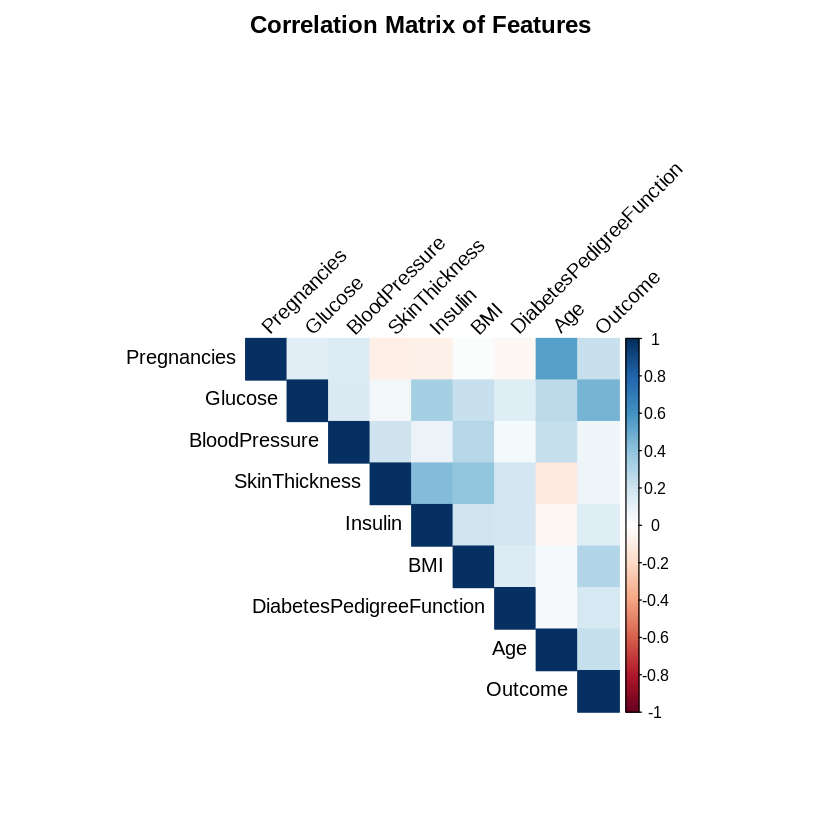

In [8]:
install.packages("corrplot")  # Install the corrplot package
library(corrplot) # Load the package after installation

# Select numeric columns for correlation matrix
numeric_data <- data[sapply(data, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
corrplot(correlation_matrix, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         title = "Correlation Matrix of Features",
         mar = c(0, 0, 2, 0))

[1] "Average Glucose Levels (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_Glucose
    <int>           <dbl>
1       0            110.
2       1            141.


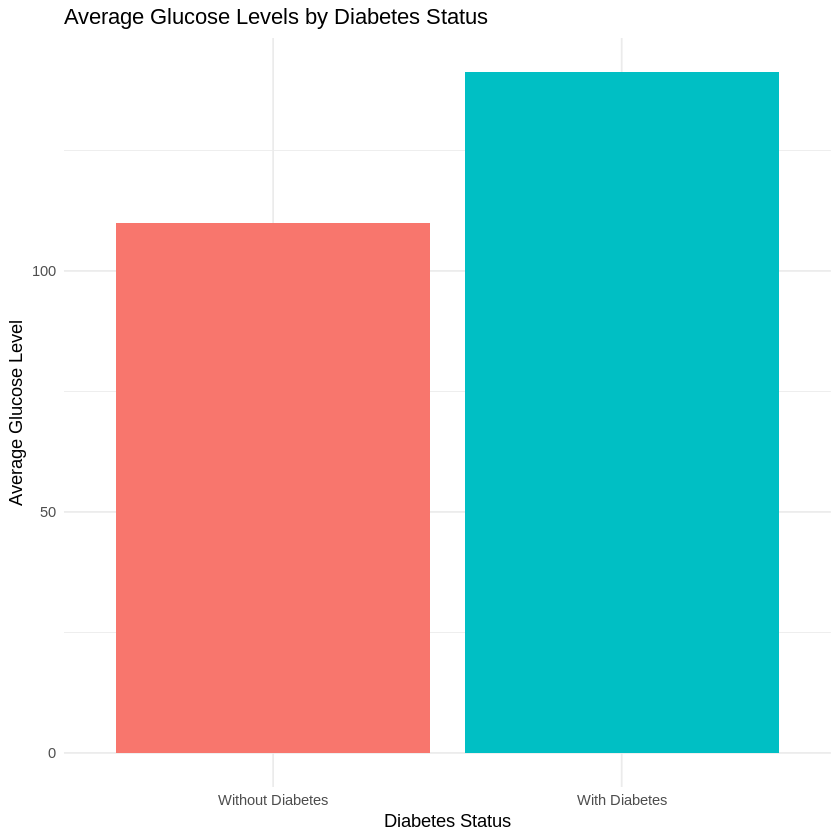

In [ ]:
# 1. Average glucose levels among patients with and without diabetes
# Visualization: Average glucose levels by diabetes status
# This plot helps compare glucose levels among diabetic and non-diabetic patients
avg_glucose <- summarize(group_by(data, Outcome), Average_Glucose = mean(Glucose, na.rm = TRUE))
print("Average Glucose Levels (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_glucose)

ggplot(avg_glucose, aes(x = as.factor(Outcome), y = Average_Glucose, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Glucose Levels by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Glucose Level") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()



[1] "Average Age by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_Age
    <int>       <dbl>
1       0        31.2
2       1        37.1


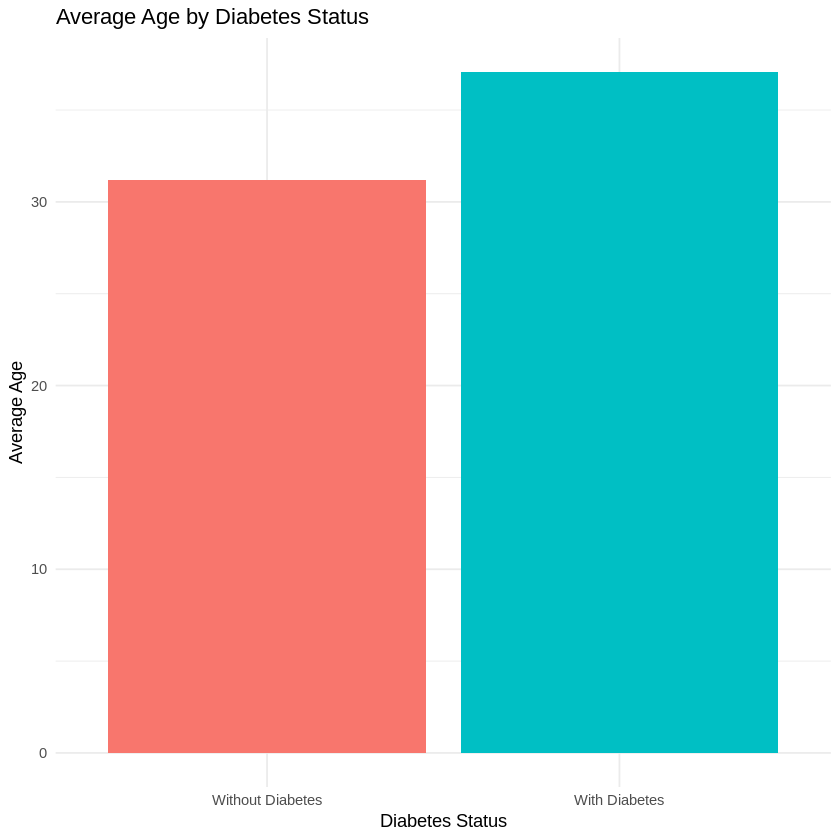

In [ ]:
# 2. Average age of patients with and without diabetes
avg_age <- summarize(group_by(data, Outcome), Average_Age = mean(Age, na.rm = TRUE))
print("Average Age by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_age)


ggplot(avg_age, aes(x = as.factor(Outcome), y = Average_Age, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Age by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Age") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

[1] "Average Blood Pressure by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_BP
    <int>      <dbl>
1       0       68.2
2       1       70.8


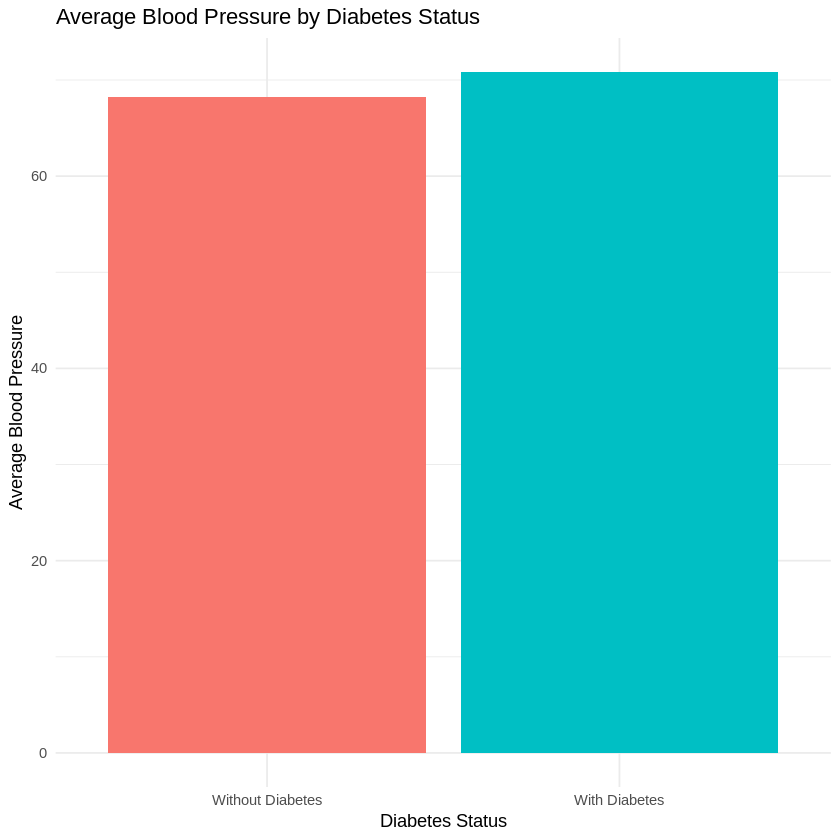

In [ ]:
# 3. Average blood pressure measurements across groups
avg_bp <- summarize(group_by(data, Outcome), Average_BP = mean(BloodPressure, na.rm = TRUE))
print("Average Blood Pressure by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_bp)

ggplot(avg_bp, aes(x = as.factor(Outcome), y = Average_BP, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Blood Pressure by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Blood Pressure") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

[1] "Average BMI by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):"
# A tibble: 2 × 2
  Outcome Average_BMI
    <int>       <dbl>
1       0        30.3
2       1        35.1


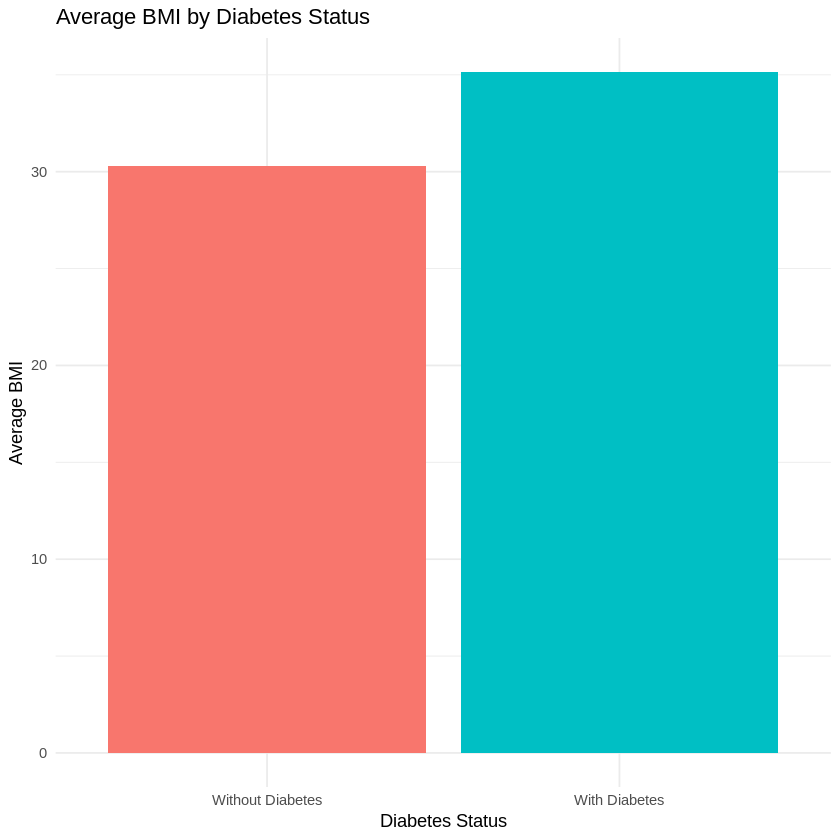

In [ ]:
# 4. Average BMI of diabetic versus non-diabetic patients
avg_bmi <- summarize(group_by(data, Outcome), Average_BMI = mean(BMI, na.rm = TRUE))
print("Average BMI by Diabetes Status (0 = Without Diabetes, 1 = With Diabetes):")
print(avg_bmi)

ggplot(avg_bmi, aes(x = as.factor(Outcome), y = Average_BMI, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average BMI by Diabetes Status",
       x = "Diabetes Status",
       y = "Average BMI") +
  scale_x_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

In [ ]:
# 5. Rate of diabetes among patients in the dataset
rate_diabetes <- mean(data[["Outcome"]]) * 100
print("Rate of Diabetes:")
print(paste(round(rate_diabetes, 2), "%", sep = ""))

[1] "Rate of Diabetes:"
[1] "34.9%"


In [ ]:
# Function to simulate repeated sampling and visualize distribution of sample means
#This function generates multiple random samples, calculates their means, and visualizes the distribution of sample means
simulate_sample_means <- function(df, col, sample_size, num_samples, ax_limits, ax_title) {
  sample_means <- replicate(num_samples, mean(sample(df[[col]], sample_size, replace = TRUE), na.rm = TRUE))
  ggplot(data.frame(sample_means), aes(x = sample_means)) +
    geom_histogram(bins = 30, color = "black", fill = "blue", alpha = 0.7) +
    labs(title = ax_title, x = "Sample Means", y = "Frequency") +
    xlim(ax_limits)
}

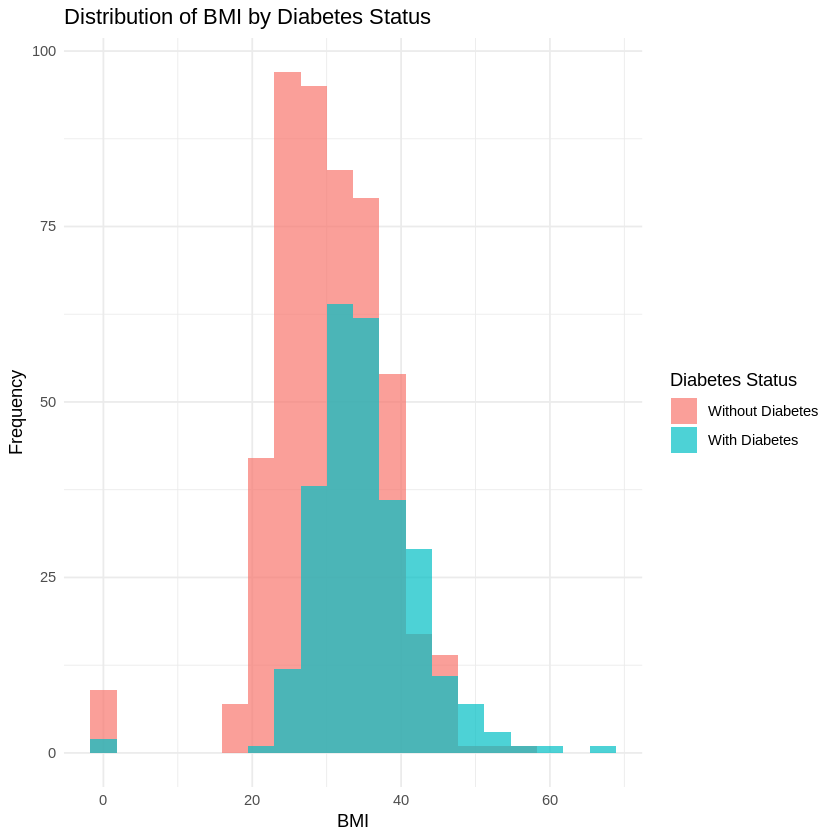

In [ ]:
# 6. Distribution of BMI values among all patients
ggplot(data, aes(x = BMI, fill = as.factor(Outcome))) +
  geom_histogram(bins = 20, alpha = 0.7, position = "identity") +
  labs(title = "Distribution of BMI by Diabetes Status",
       x = "BMI",
       y = "Frequency",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

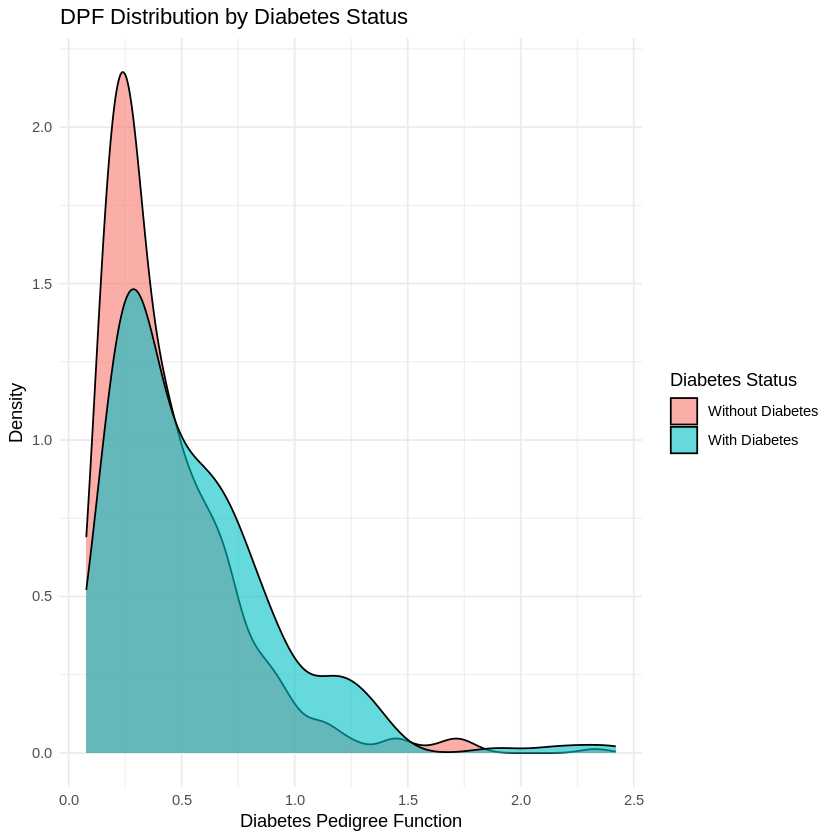

In [ ]:
# 7. Distribution of Diabetes Pedigree Function (DPF) by groups
ggplot(data, aes(x = DiabetesPedigreeFunction, fill = as.factor(Outcome))) +
  geom_density(alpha = 0.6) +
  labs(title = "DPF Distribution by Diabetes Status",
       x = "Diabetes Pedigree Function",
       y = "Density",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

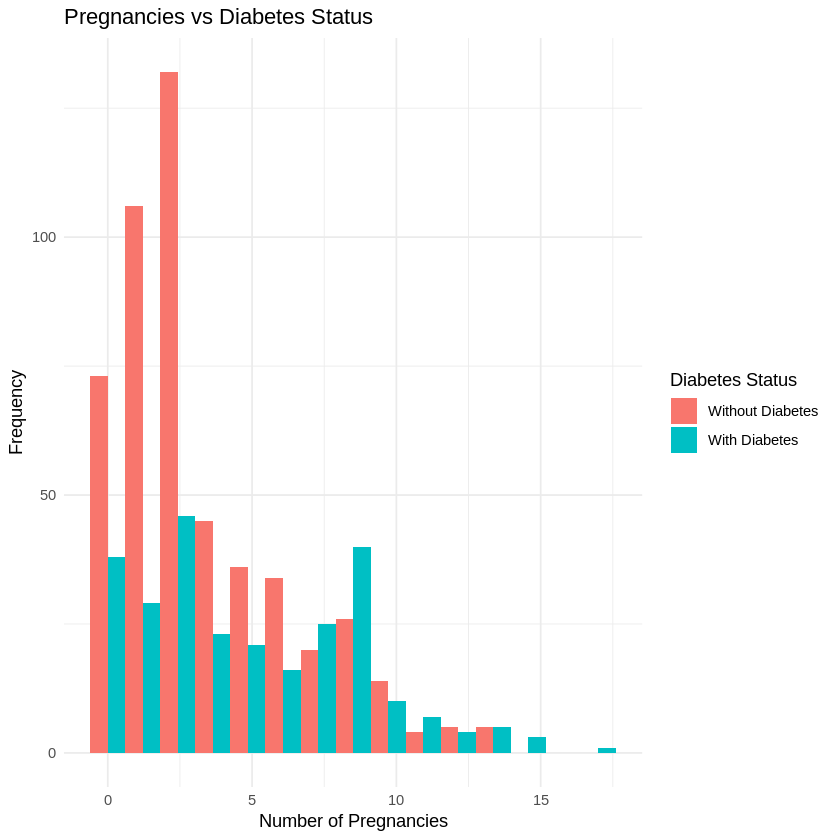

In [ ]:
# 8. Relationship between pregnancies and diabetes occurrence
ggplot(data, aes(x = Pregnancies, fill = as.factor(Outcome))) +
  geom_histogram(bins = 15, position = "dodge") +
  labs(title = "Pregnancies vs Diabetes Status",
       x = "Number of Pregnancies",
       y = "Frequency",
       fill = "Diabetes Status") +
  scale_fill_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()


[1] "Correlation between Glucose and BMI:"
[1] 0.2210711


`geom_smooth()` using formula = 'y ~ x'


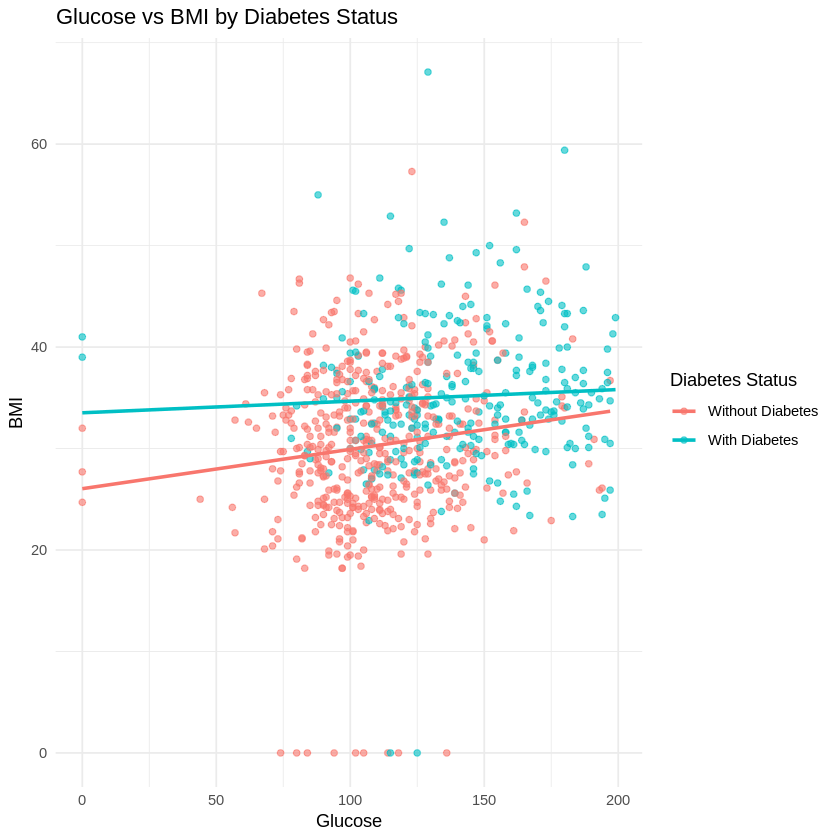

In [ ]:
# 9. Correlation between glucose levels and BMI
cor_glucose_bmi <- cor(data[["Glucose"]], data[["BMI"]], use = "complete.obs")
print("Correlation between Glucose and BMI:")
print(cor_glucose_bmi)

ggplot(data, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Glucose vs BMI by Diabetes Status",
       x = "Glucose",
       y = "BMI",
       color = "Diabetes Status") +
  scale_color_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


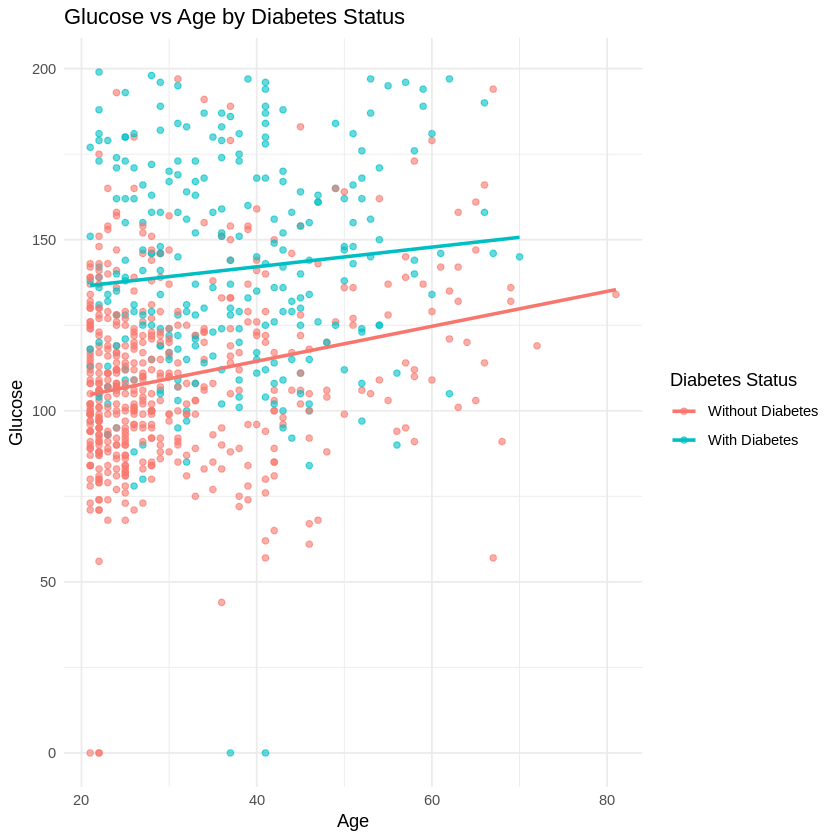

In [ ]:
# 10. Trend of glucose levels with age by groups
ggplot(data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Glucose vs Age by Diabetes Status",
       x = "Age",
       y = "Glucose",
       color = "Diabetes Status") +
  scale_color_discrete(labels = c("0" = "Without Diabetes", "1" = "With Diabetes")) +
  theme_minimal()


In [ ]:
# Save the summaries
write.csv(avg_glucose, "/content/avg_glucose.csv", row.names = FALSE)
write.csv(avg_age, "/content/avg_age.csv", row.names = FALSE)
write.csv(avg_bp, "/content/avg_bp.csv", row.names = FALSE)
write.csv(avg_bmi, "/content/avg_bmi.csv", row.names = FALSE)

print("Exploratory analysis complete.")


[1] "Exploratory analysis complete."


**PART 2: Answering Questions:**

Analyzing relationship between BMI and insulin for diabetic patients:


`geom_smooth()` using formula = 'y ~ x'


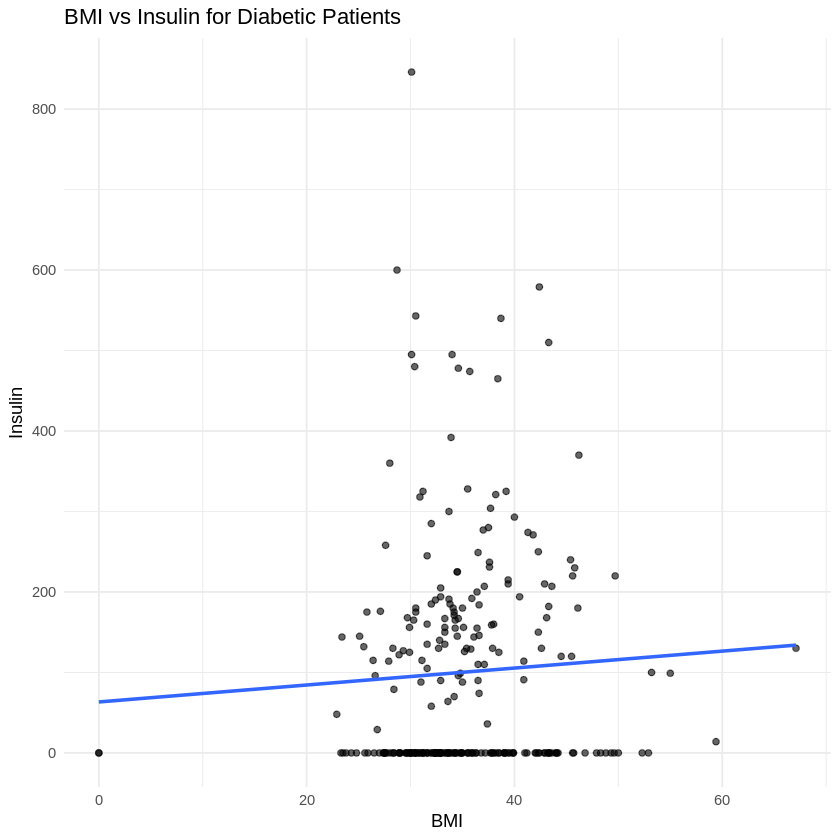

In [ ]:
# 1. Relationship between BMI and insulin concentrations for diabetic patients
# This plot helps identify patterns between BMI and insulin concentrations
#This scatterplot and regression line illustrate the relationship between BMI and insulin concentrations for diabetic patients
cat("Analyzing relationship between BMI and insulin for diabetic patients:\n")
bmi_insulin_plot <- ggplot(filter(data, Outcome == 1), aes(x = BMI, y = Insulin)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "BMI vs Insulin for Diabetic Patients",
       x = "BMI",
       y = "Insulin") +
  theme_minimal()
print(bmi_insulin_plot)

Analyzing diabetes rates for younger vs older patients:


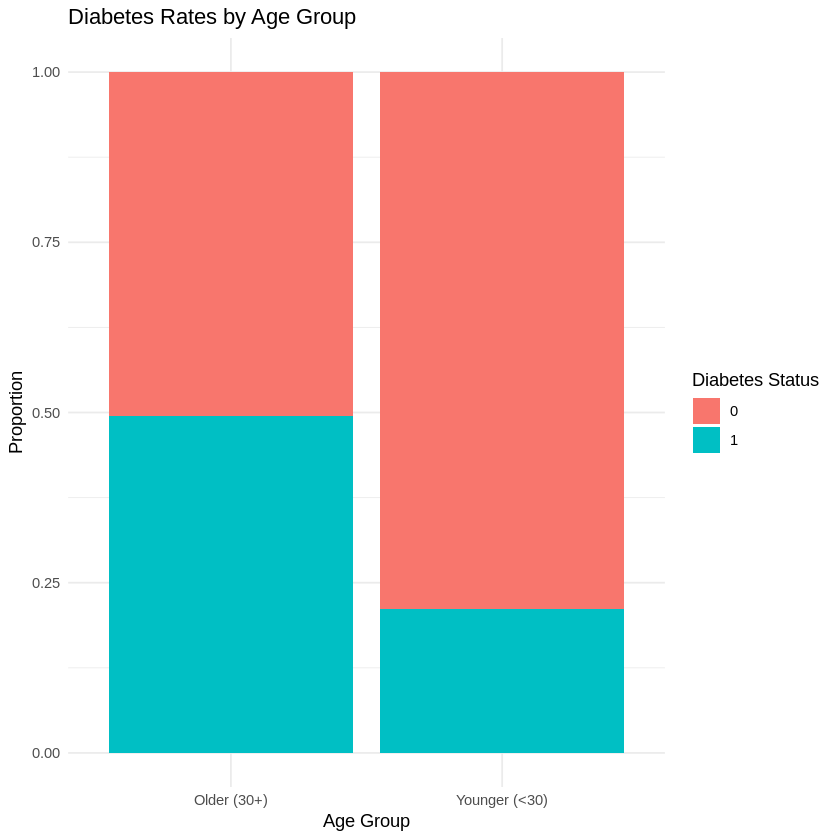

In [ ]:
# 2. Diabetes rates for younger vs older patients
# this plot visualizes the proportion of diabetic and non-diabetic patients in two age groups: younger (<30) and older (30+)
cat("Analyzing diabetes rates for younger vs older patients:\n")
data[["AgeGroup"]] <- ifelse(data[["Age"]] < 30, "Younger (<30)", "Older (30+)")
age_group_plot <- ggplot(data, aes(x = AgeGroup, fill = as.factor(Outcome))) +
  geom_bar(position = "fill") +
  labs(title = "Diabetes Rates by Age Group",
       x = "Age Group",
       y = "Proportion",
       fill = "Diabetes Status") +
  theme_minimal()
print(age_group_plot)

Analyzing DPF variation across age groups:


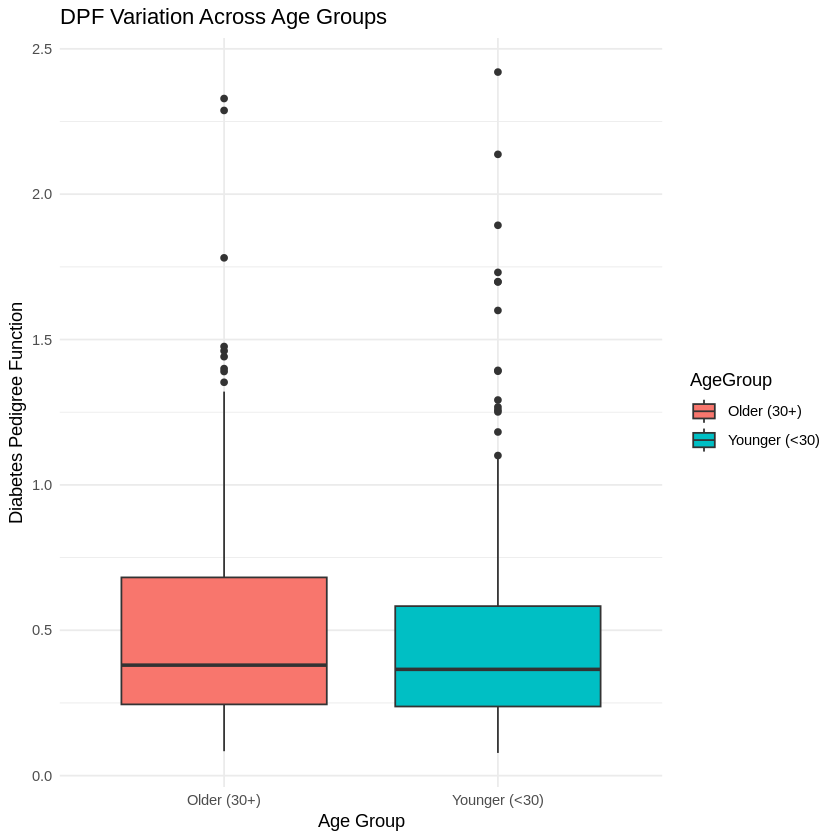

In [ ]:
# 3. Diabetes Pedigree Function (DPF) variation across age groups
cat("Analyzing DPF variation across age groups:\n")
dpf_age_plot <- ggplot(data, aes(x = AgeGroup, y = DiabetesPedigreeFunction)) +
  geom_boxplot(aes(fill = AgeGroup)) +
  labs(title = "DPF Variation Across Age Groups",
       x = "Age Group",
       y = "Diabetes Pedigree Function") +
  theme_minimal()
print(dpf_age_plot)

Analyzing difference in BMI for patients with and without diabetes:
T-test results for BMI:

	Welch Two Sample t-test

data:  BMI by Outcome
t = -8.6193, df = 573.47, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -5.940864 -3.735811
sample estimates:
mean in group 0 mean in group 1 
       30.30420        35.14254 



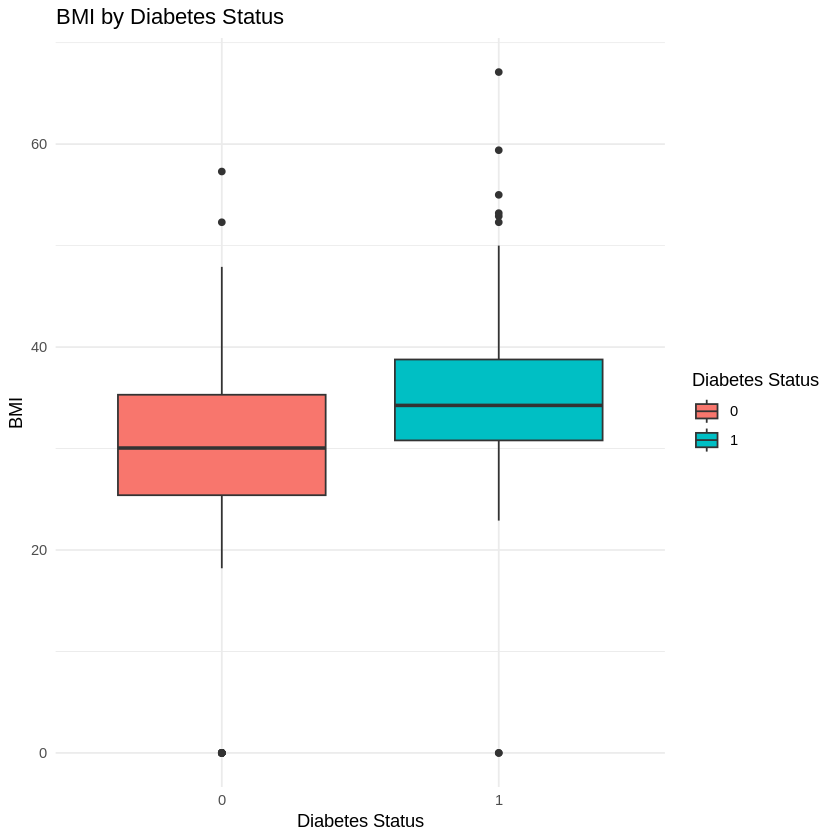

In [ ]:
# 4. Difference in BMI for patients with and without diabetes
cat("Analyzing difference in BMI for patients with and without diabetes:\n")
bmi_boxplot <- ggplot(data, aes(x = as.factor(Outcome), y = BMI, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(title = "BMI by Diabetes Status",
       x = "Diabetes Status",
       y = "BMI",
       fill = "Diabetes Status") +
  theme_minimal()
print(bmi_boxplot)

ttest_bmi <- t.test(BMI ~ Outcome, data = data)
cat("T-test results for BMI:\n")
print(ttest_bmi)

Analyzing relationship between blood pressure and glucose levels:


`geom_smooth()` using formula = 'y ~ x'


Correlation between blood pressure and glucose levels: 0.1525896 
[1] "Part 2 analysis complete."


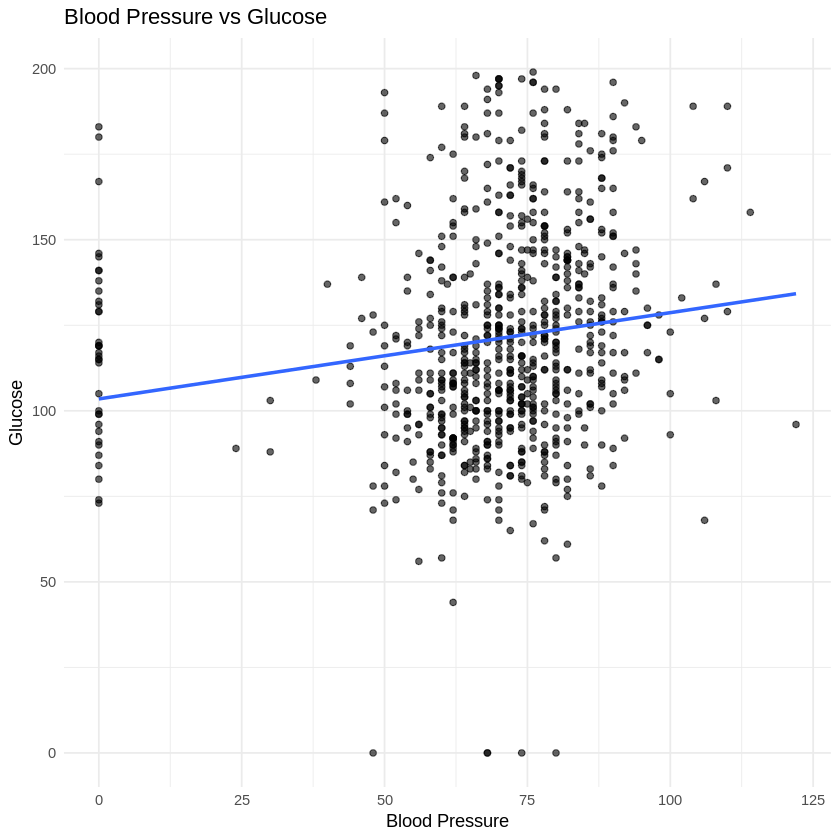

In [ ]:
# 5. Relationship between blood pressure and glucose levels
cat("Analyzing relationship between blood pressure and glucose levels:\n")
bp_glucose_plot <- ggplot(data, aes(x = BloodPressure, y = Glucose)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Blood Pressure vs Glucose",
       x = "Blood Pressure",
       y = "Glucose") +
  theme_minimal()
print(bp_glucose_plot)

correlation_bp_glucose <- cor(data$BloodPressure, data$Glucose, use = "complete.obs")
cat("Correlation between blood pressure and glucose levels:", correlation_bp_glucose, "\n")

print("Part 2 analysis complete.")

**PART 3: Hypothesis Testing:**

In [ ]:
# 3.1 Hypothesis Test: Claim - Significant difference in glucose levels between diabetic and non-diabetic patients

# State the test and hypotheses
cat("\nHypothesis Test: Significant Difference in Glucose Levels\n")
cat("Test: Two-sample t-test (assumes unequal variances)\n")
cat("Null Hypothesis (H0): There is no significant difference in glucose levels between diabetic and non-diabetic patients.\n")
cat("Alternative Hypothesis (H1): There is a significant difference in glucose levels between diabetic and non-diabetic patients.\n")

# Perform the test
test_result <- t.test(data[["Glucose"]][data[["Outcome"]] == 0], data[["Glucose"]][data[["Outcome"]] == 1], var.equal = FALSE)
# Report the result
cat("Test Statistic:", test_result[["statistic"]], "\n")
cat("Degrees of Freedom:", test_result[["parameter"]], "\n")
cat("p-value:", test_result[["p.value"]], "\n")

# Make a conclusion
alpha <- 0.05
if (test_result[["p.value"]] < alpha) {
  cat("Conclusion: Reject the null hypothesis (H0). There is a significant difference in glucose levels between diabetic and non-diabetic patients.\n")
} else {
  cat("Conclusion: Fail to reject the null hypothesis (H0). No significant difference in glucose levels between diabetic and non-diabetic patients.\n")
}


Hypothesis Test: Significant Difference in Glucose Levels
Test: Two-sample t-test (assumes unequal variances)
Null Hypothesis (H0): There is no significant difference in glucose levels between diabetic and non-diabetic patients.
Alternative Hypothesis (H1): There is a significant difference in glucose levels between diabetic and non-diabetic patients.
Test Statistic: -13.75154 
Degrees of Freedom: 461.3317 
p-value: 2.644161e-36 
Conclusion: Reject the null hypothesis (H0). There is a significant difference in glucose levels between diabetic and non-diabetic patients.


In [ ]:
# 3.2 Hypothesis Test: Custom Claim - Significant difference in BMI between diabetic and non-diabetic patients

# State the test and hypotheses
cat("\nHypothesis Test: Significant Difference in BMI\n")
cat("Test: Two-sample t-test (assumes unequal variances)\n")
cat("Null Hypothesis (H0): There is no significant difference in BMI between diabetic and non-diabetic patients.\n")
cat("Alternative Hypothesis (H1): There is a significant difference in BMI between diabetic and non-diabetic patients.\n")

# Perform the test
test_result_bmi <- t.test(data[["BMI"]][data[["Outcome"]] == 0], data[["BMI"]][data[["Outcome"]] == 1], var.equal = FALSE)

# Report the result
cat("Test Statistic:", test_result_bmi[["statistic"]], "\n")
cat("Degrees of Freedom:", test_result_bmi[["parameter"]], "\n")
cat("p-value:", test_result_bmi[["p.value"]], "\n")

# Make a conclusion
alpha <- 0.05
if (test_result_bmi[["p.value"]] < alpha) {
  cat("Conclusion: Reject the null hypothesis (H0). There is a significant difference in BMI between diabetic and non-diabetic patients.\n")
} else {
  cat("Conclusion: Fail to reject the null hypothesis (H0). No significant difference in BMI between diabetic and non-diabetic patients.\n")
}

print("Hypothesis Testing Complete.")



Hypothesis Test: Significant Difference in BMI
Test: Two-sample t-test (assumes unequal variances)
Null Hypothesis (H0): There is no significant difference in BMI between diabetic and non-diabetic patients.
Alternative Hypothesis (H1): There is a significant difference in BMI between diabetic and non-diabetic patients.
Test Statistic: -8.619317 
Degrees of Freedom: 573.4725 
p-value: 6.566238e-17 
Conclusion: Reject the null hypothesis (H0). There is a significant difference in BMI between diabetic and non-diabetic patients.
[1] "Hypothesis Testing Complete."


**PART 4: Simulation Task:**

In [ ]:
# 4.1 Take 25 Random Samples of Size 15 from the Dataset
# The simulation uses loops for repeated sampling and confidence interval calculation
# Select a column (e.g., Glucose)
selected_column <- data[["Glucose"]]
population_mean <- mean(selected_column, na.rm = TRUE)
sd_population <- sd(selected_column, na.rm = TRUE)

cat("Population Mean:", population_mean, "\n")

# Initialize variables to store results
sample_means_15 <- c()
ci_coverage_15 <- 0

set.seed(123) # For reproducibility
for (i in 1:25) {
  # sample_data should now be a numeric vector
  sample_data <- sample(selected_column, size = 15, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(15)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_15 <- append(sample_means_15, sample_mean)

  # Check if the population mean is within the confidence interval
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_15 <- ci_coverage_15 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_15 <- ci_coverage_15 / 25
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 15):", coverage_proportion_15, "\n")

Population Mean: 120.8945 
Sample 1 CI: 101.379 - 140.4876 
Sample 2 CI: 89.31737 - 120.5493 
Sample 3 CI: 115.511 - 146.7556 
Sample 4 CI: 109.8002 - 140.5998 
Sample 5 CI: 105.2233 - 137.7101 
Sample 6 CI: 111.3959 - 141.1374 
Sample 7 CI: 120.9477 - 144.119 
Sample 8 CI: 112.8329 - 145.0338 
Sample 9 CI: 101.2566 - 137.4101 
Sample 10 CI: 100.1283 - 121.605 
Sample 11 CI: 104.904 - 139.3626 
Sample 12 CI: 102.8557 - 137.1443 
Sample 13 CI: 107.2368 - 139.2965 
Sample 14 CI: 111.2628 - 142.0706 
Sample 15 CI: 104.1155 - 128.9512 
Sample 16 CI: 109.6583 - 147.0083 
Sample 17 CI: 101.8651 - 138.2682 
Sample 18 CI: 106.3533 - 126.0467 
Sample 19 CI: 86.11779 - 121.2155 
Sample 20 CI: 114.5743 - 147.6924 
Sample 21 CI: 84.30486 - 120.2285 
Sample 22 CI: 99.33502 - 130.265 
Sample 23 CI: 120.6746 - 135.8587 
Sample 24 CI: 99.68951 - 133.3772 
Sample 25 CI: 103.3252 - 137.8748 

Proportion of Confidence Intervals Containing the Population Mean (Size 15): 0.88 


In [ ]:
# 4.2 Increase the Sample Size to 100

# Initialize variables to store results
sample_means_100 <- c()
ci_coverage_100 <- 0

for (i in 1:25) {
  sample_data <- sample(selected_column, size = 100, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(100)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_100 <- append(sample_means_100, sample_mean)

  # Check if the population mean is within the confidence interval
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_100 <- ci_coverage_100 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_100 <- ci_coverage_100 / 25
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 100):", coverage_proportion_100, "\n")

Sample 1 CI: 115.9886 - 127.2914 
Sample 2 CI: 117.8915 - 130.0885 
Sample 3 CI: 114.3145 - 127.3855 
Sample 4 CI: 115.8709 - 128.4091 
Sample 5 CI: 113.841 - 125.339 
Sample 6 CI: 110.2032 - 123.0568 
Sample 7 CI: 114.2881 - 125.9319 
Sample 8 CI: 109.3392 - 122.1608 
Sample 9 CI: 114.438 - 125.002 
Sample 10 CI: 114.5883 - 128.3717 
Sample 11 CI: 110.5069 - 123.9531 
Sample 12 CI: 110.3404 - 123.2596 
Sample 13 CI: 110.2286 - 120.2314 
Sample 14 CI: 114.2915 - 127.0885 
Sample 15 CI: 115.948 - 127.512 
Sample 16 CI: 122.3501 - 134.3099 
Sample 17 CI: 111.5382 - 123.3618 
Sample 18 CI: 115.1658 - 127.8342 
Sample 19 CI: 115.3792 - 127.2408 
Sample 20 CI: 116.4596 - 127.4804 
Sample 21 CI: 113.4625 - 126.1975 
Sample 22 CI: 117.9243 - 129.6757 
Sample 23 CI: 116.9131 - 130.5269 
Sample 24 CI: 114.0369 - 126.5631 
Sample 25 CI: 114.9199 - 127.3401 

Proportion of Confidence Intervals Containing the Population Mean (Size 100): 0.92 


In [ ]:
# 4.3 Take 20 Random Samples of Size 10 from the Dataset

# Initialize variables to store results
sample_means_10 <- c()
ci_coverage_10 <- 0

for (i in 1:20) {
  sample_data <- sample(selected_column, size = 10, replace = FALSE)
  sample_mean <- mean(sample_data)
  sample_se <- sd(sample_data) / sqrt(10)
  ci_lower <- sample_mean - qnorm(0.975) * sample_se
  ci_upper <- sample_mean + qnorm(0.975) * sample_se
  sample_means_10 <- append(sample_means_10, sample_mean)

  # Check if the population mean is within the confidence interval
  if (population_mean >= ci_lower && population_mean <= ci_upper) {
    ci_coverage_10 <- ci_coverage_10 + 1
  }
  cat("Sample", i, "CI:", ci_lower, "-", ci_upper, "\n")
}

coverage_proportion_10 <- ci_coverage_10 / 20
cat("\nProportion of Confidence Intervals Containing the Population Mean (Size 10):", coverage_proportion_10, "\n")

Sample 1 CI: 120.7412 - 160.0588 
Sample 2 CI: 98.44749 - 124.1525 
Sample 3 CI: 106.0208 - 145.9792 
Sample 4 CI: 91.75984 - 123.2402 
Sample 5 CI: 94.89642 - 130.5036 
Sample 6 CI: 98.00242 - 141.1976 
Sample 7 CI: 97.14624 - 140.2538 
Sample 8 CI: 103.5982 - 141.4018 
Sample 9 CI: 98.92896 - 138.471 
Sample 10 CI: 100.5229 - 134.6771 
Sample 11 CI: 84.42802 - 127.972 
Sample 12 CI: 93.09375 - 143.3062 
Sample 13 CI: 107.3841 - 143.2159 
Sample 14 CI: 101.379 - 146.421 
Sample 15 CI: 102.0706 - 151.5294 
Sample 16 CI: 102.2245 - 130.7755 
Sample 17 CI: 111.5732 - 141.2268 
Sample 18 CI: 102.7049 - 131.0951 
Sample 19 CI: 103.859 - 135.741 
Sample 20 CI: 101.8692 - 130.5308 

Proportion of Confidence Intervals Containing the Population Mean (Size 10): 1 


In [ ]:
# Summary of Findings
cat("\n--- Summary of Findings ---\n")
cat("Sample Size 15: Coverage Proportion:", coverage_proportion_15, "\n")
cat("Sample Size 100: Coverage Proportion:", coverage_proportion_100, "\n")
cat("Sample Size 10: Coverage Proportion:", coverage_proportion_10, "\n")

cat("\nObserve the behavior of confidence intervals: Larger sample sizes result in narrower confidence intervals and higher accuracy.")


--- Summary of Findings ---
Sample Size 15: Coverage Proportion: 0.88 
Sample Size 100: Coverage Proportion: 0.92 
Sample Size 10: Coverage Proportion: 1 

Observe the behavior of confidence intervals: Larger sample sizes result in narrower confidence intervals and higher accuracy.